In [60]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

In [61]:
# Reading the data into the dataframe
df = pd.read_csv('/Users/aravindnambiar/Downloads/quora-question-pairs/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [62]:
# Taking sample from the population dataset to train the model
df1 = df.loc[df['is_duplicate']==0].head(20000)
df2 = df.loc[df['is_duplicate']==1].head(20000)
df=pd.concat([df1,df2])
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [63]:
# Analysing the shape of the sample dataset
df.shape

(40000, 6)

In [64]:
# Checking for null values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [67]:
# Displaying the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 0 to 53626
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40000 non-null  int64 
 1   qid1          40000 non-null  int64 
 2   qid2          40000 non-null  int64 
 3   question1     40000 non-null  object
 4   question2     40000 non-null  object
 5   is_duplicate  40000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.1+ MB


In [69]:
# Preprocessing function for performing tokenisation, stopwords removal and lemmatisation
def preprocessing(question):

    word_lem = WordNetLemmatizer()
    list_of_list=[]

    for sentence in question:
        sentence = re.sub('[^a-zA-Z]', ' ',sentence)
        sentence = sentence.lower()
        list_of_words=[]
        for word in sentence.split(' '):
            if word not in stopwords.words():
                list_of_words.append(word_lem.lemmatize(word))
        list_of_list.append(list_of_words)  
    return list_of_list  

In [70]:
# Preprocessing question 1
result1=preprocessing(df['question1'])

In [71]:
# Preprocessed question 1
result1

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india', ''],
 ['story', 'kohinoor', '', 'koh', 'noor', '', 'diamond', ''],
 ['increase', 'speed', 'internet', 'connection', 'vpn', ''],
 ['mentally', 'lonely', '', 'solve', ''],
 ['dissolve',
  'water',
  'quikly',
  'sugar',
  '',
  'salt',
  '',
  'methane',
  'carbon',
  'oxide',
  ''],
 ['buy', 'tiago', ''],
 ['', '', 'instead', '', '', ''],
 ['motorola',
  '',
  'company',
  '',
  '',
  'hack',
  'charter',
  'motorolla',
  'dcx',
  '',
  '',
  '',
  '',
  ''],
 ['method', 'find', 'separation', 'slit', 'fresnel', 'biprism', ''],
 ['law',
  'change',
  'status',
  'student',
  'visa',
  'green',
  'card',
  '',
  'compare',
  'immigration',
  'law',
  'canada',
  ''],
 ['girl', 'friend', 'guy', 'reject', ''],
 ['digital', 'marketing', 'institution', 'banglore', ''],
 ['causing', 'jealous', ''],
 ['question', 'quora', ''],
 ['', '', '', 'kv', 'hp', ''],
 ['time', 'clock', 'number', ''],
 ['tip', 'making', 'job', 'interview', '

In [72]:
# Preprocessing question 2
result2=preprocessing(df['question2'])

In [73]:
# TFIDF vectoriser function
tf_idf=TfidfVectorizer()
def tf_idf_vectoriser(result):
    tf_input=[]
    for sentence in result:
        tf_input.append(' '.join(sentence))
    return tf_idf.fit_transform(tf_input)

In [74]:
# Converting text into vectors using TFIDF
X1_tf=tf_idf_vectoriser(result1)
X2_tf=tf_idf_vectoriser(result2)

In [75]:
# Word2Vec vectoriser function
def word2vecprocessor(result, max_len):
    sentence_list = []
    word2vec_model_X = Word2Vec(sentences=result, vector_size=100, window=5, min_count=1, workers=4)
    for sentence in result:
        word_list = []
        for word in sentence:
            word_list.append(word2vec_model_X.wv[word])
        # Pad shorter lists with zeros
        if len(word_list) < max_len:
            word_list.extend([np.zeros(100)] * (max_len - len(word_list)))
        sentence_list.append(word_list)
    # Convert the list to a NumPy array
    return np.array(sentence_list) 

# Assuming max_len is the maximum length of word vectors in your data
max_len = max(len(sentence) for sentence in result1 + result2)
# Converting the text to vectors using Word2Vec
X1_word2vec = word2vecprocessor(result1, max_len)
X2_word2vec = word2vecprocessor(result2, max_len)

In [76]:
# Flattening the vectors for dimensionality optimisation
X1_word2vec_flat = X1_word2vec.reshape(X1_word2vec.shape[0], -1)
X2_word2vec_flat = X2_word2vec.reshape(X2_word2vec.shape[0], -1)

In [77]:
from scipy.sparse import hstack

In [78]:
# Concatenating the X features (Word2Vec)
X_word2vec_combined = np.concatenate([X1_word2vec_flat, X2_word2vec_flat], axis=-1)

In [79]:
# Concatenating the X features (TFIDF)
X_tf_combined = hstack([X1_tf,X2_tf])

In [80]:
# Converting the independent feature to array
y=df['is_duplicate'].values
y.shape

(40000,)

In [81]:
# Importing libraries for model training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy

In [82]:
# Train test split (TFIDF)
X_train, X_test, y_train, y_test = train_test_split(X_tf_combined.toarray(),y,test_size=0.7,random_state=42)

In [84]:
# Training and testing the logistic regression model for TFIDF vectors
lg=LogisticRegression()

lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
accuracy_tf_log=accuracy_score(y_test,y_pred)

In [85]:
# Training and testing the random forest classifier model for TFIDF vectors
rf=RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_tf_rf = accuracy_score(y_test,y_pred)

In [86]:
# Train test split (Word2Vec)
X_train, X_test, y_train, y_test = train_test_split(X_word2vec_combined,y,test_size=0.7,random_state=42)

In [ ]:
# Training and testing the logistic regression model for Word2Vec vectors
lg=LogisticRegression()

lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
accuracy_word2vec_log = accuracy_score(y_test,y_pred)

In [88]:
# Training and testing the random forest classifier model for Word2Vec vectors
rf=RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_word2vec_rf = accuracy_score(y_test,y_pred)

In [95]:
# Creating a results dataframe 
results = [('Logistic Regression', accuracy_tf_log, accuracy_word2vec_log ),
    ('Random Forest Classifier', accuracy_tf_rf, accuracy_word2vec_rf)
]
results_df = pd.DataFrame(results, columns = ['Model','TFIDF','Word2Vec'])

In [96]:
# Displaying the results dataframe with accuracy scores of models for different vectorisation algorithms
results_df.head()

,Model,TFIDF,Word2Vec
0,Logistic Regression,0.664214,0.644964
1,Random Forest Classifier,0.686821,0.700214


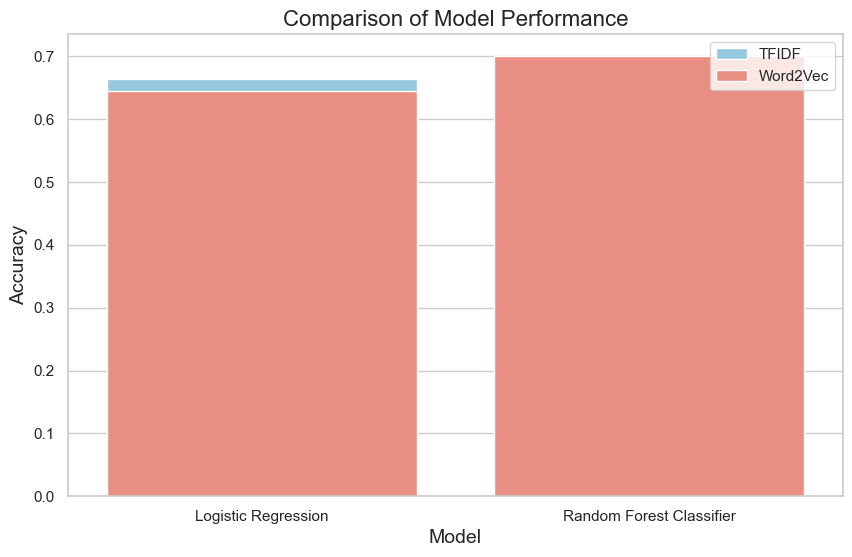

In [104]:
# Visualising the results with accuracy scores of models for different vectorisation algorithms
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Model', y='TFIDF', data=results_df, color='skyblue', label='TFIDF')
sns.barplot(x='Model', y='Word2Vec', data=results_df, color='salmon', label='Word2Vec')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Model Performance', fontsize=16)
plt.legend(loc='upper right')
plt.show()


# From the analysis, the optimal combination for achieving the best accuracy score is the use of random forest classifier model with Word2Vec for vectorisation.